###### Basic Data Analysis with Pandas and Data Visualisation on the Standard Metropolitan Area Dataset.

## About the Dataset
###### It contains data of 99 standard metropolitan areas in the US. The data set provides information on 10 variables for each area for the period 1976-1977. The areas have been divided into 4 geographic regions: 1=North-East, 2=North-Central, 3=South, 4=West.



## Data Dicription
###### land_area : size in square miles
###### percent_city : percent of population in central city/cities
###### percent_senior : percent of population ≤ 65 years
###### physicians : number of professionally active physicians
###### hospital_beds : total number of hospital beds
###### graduates : percent of adults that finished high school
###### work_force : number of persons in work force in thousands
###### income : total income in 1976 in millions of dollars
###### crime_rate : Ratio of number of serious crimes by total population
###### region : geographic region according to US Census

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Assignment_Solutions/master/Standard%20Metropolitan%20Areas%20Data%20-%20train_data%20-%20data.csv")

In [6]:
data.dtypes

land_area           int64
percent_city      float64
percent_senior    float64
physicians          int64
hospital_beds       int64
graduates         float64
work_force        float64
income              int64
region              int64
crime_rate        float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
land_area         99 non-null int64
percent_city      99 non-null float64
percent_senior    99 non-null float64
physicians        99 non-null int64
hospital_beds     99 non-null int64
graduates         99 non-null float64
work_force        99 non-null float64
income            99 non-null int64
region            99 non-null int64
crime_rate        99 non-null float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [9]:
data.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


In [16]:
data["region"].value_counts()

3    36
2    25
1    21
4    17
Name: region, dtype: int64

###### correlation matrix among the features of the dataset

In [18]:
data.corr()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


In [22]:
data.head(5)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


###### line plot between land area and crime rate

<function matplotlib.pyplot.show(*args, **kw)>

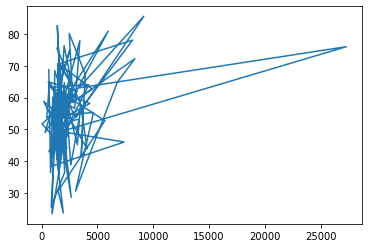

In [28]:
plt.plot(data["land_area"], data["crime_rate"])
plt.show

###### correlation information is correct between two variables

<function matplotlib.pyplot.show(*args, **kw)>

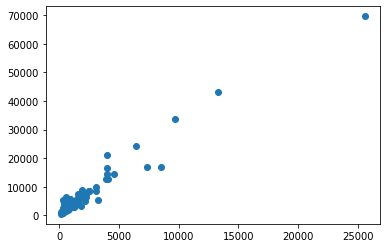

In [29]:
plt.scatter(data["physicians"], data["hospital_beds"])
plt.show

######  bar plot of geographic regions

C:\Users\DC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


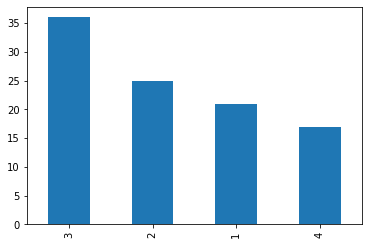

In [36]:
data['region'].value_counts().plot('bar')

###### distribution of income of the Metropolitan areas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BE39D6188>]],
      dtype=object)

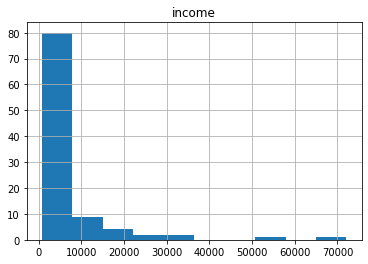

In [37]:
data.hist("income")